In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bengaluru-house-price-data/Bengaluru_House_Data.csv


# Extract Data

In [2]:
data = pd.read_csv("/kaggle/input/bengaluru-house-price-data/Bengaluru_House_Data.csv")
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
print(data.shape)
print(data.info())
print(data.describe())

(13320, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB
None
               bath       balcony         price
count  13247.000000  12711.000000  13320.000000
mean       2.692610      1.584376    112.565627
std        1.341458      0.817263    148.971674
min        1.000000      0.000000      8.000000
25%        2.000000      1.000000     50.000000
50%        2.000000      2.000000     72.000000
75%        3.

# Check for unique values

In [4]:
for i in data.columns:
    print(i , " >> ", data[i].sort_values().unique())
    print(" ")

area_type  >>  ['Built-up  Area' 'Carpet  Area' 'Plot  Area' 'Super built-up  Area']
 
availability  >>  ['14-Jul' '14-Nov' '15-Aug' '15-Dec' '15-Jun' '15-Nov' '15-Oct' '16-Dec'
 '16-Jan' '16-Jul' '16-Mar' '16-Nov' '16-Oct' '16-Sep' '17-Apr' '17-Aug'
 '17-Dec' '17-Feb' '17-Jan' '17-Jul' '17-Jun' '17-Mar' '17-May' '17-Nov'
 '17-Oct' '17-Sep' '18-Apr' '18-Aug' '18-Dec' '18-Feb' '18-Jan' '18-Jul'
 '18-Jun' '18-Mar' '18-May' '18-Nov' '18-Oct' '18-Sep' '19-Apr' '19-Aug'
 '19-Dec' '19-Feb' '19-Jan' '19-Jul' '19-Jun' '19-Mar' '19-May' '19-Nov'
 '19-Oct' '19-Sep' '20-Apr' '20-Aug' '20-Dec' '20-Feb' '20-Jan' '20-Jul'
 '20-Jun' '20-Mar' '20-May' '20-Nov' '20-Oct' '20-Sep' '21-Aug' '21-Dec'
 '21-Feb' '21-Jan' '21-Jul' '21-Jun' '21-Mar' '21-May' '21-Nov' '21-Oct'
 '21-Sep' '22-Dec' '22-Jan' '22-Jun' '22-Mar' '22-May' '22-Nov'
 'Immediate Possession' 'Ready To Move']
 
location  >>  [' Anekal' ' Banaswadi' ' Basavangudi' ... 'white field,kadugodi'
 'whitefiled' nan]
 
size  >>  ['1 BHK' '1 Bedroom'

In [5]:
# 43 Bedroom
print(data[data['size']=='43 Bedroom'])

# 40 bathroom
print(data[data['bath']==40])

# Drop this data
data=data[data['bath']!=40]

       area_type   availability     location        size society total_sqft  \
4684  Plot  Area  Ready To Move  Munnekollal  43 Bedroom     NaN       2400   

      bath  balcony  price  
4684  40.0      0.0  660.0  
       area_type   availability     location        size society total_sqft  \
4684  Plot  Area  Ready To Move  Munnekollal  43 Bedroom     NaN       2400   

      bath  balcony  price  
4684  40.0      0.0  660.0  


In [6]:
# NaN society
display(data[data['society'].isnull()])

# Society having NaN should be considered a different group as they can be independent house.
data['society']=data['society'].fillna('Independent')

# Now we are dividing society into two groups : Society and Independent
data['society']=data['society'].apply(lambda x : 'Independent' if x == 'Independent' else 'Society')

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.00
10,Super built-up Area,18-Feb,Whitefield,3 BHK,NaN,1800,2.0,2.0,70.00
...,...,...,...,...,...,...,...,...,...
13310,Super built-up Area,Ready To Move,Rachenahalli,2 BHK,NaN,1050,2.0,2.0,52.71
13311,Plot Area,Ready To Move,Ramamurthy Nagar,7 Bedroom,NaN,1500,9.0,2.0,250.00
13312,Super built-up Area,Ready To Move,Bellandur,2 BHK,NaN,1262,2.0,2.0,47.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00


In [7]:
data

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Society,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Society,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,Independent,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Society,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,Independent,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,Society,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,Independent,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Society,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,Society,4689,4.0,1.0,488.00


In [8]:
# Availability column
# Sorting and Encoding Availability column data
# Immediate possesion and Read to Move are considered as 0

from datetime import datetime
new=[]
for i in enumerate(data['availability']):
    if (i[1]!='Ready To Move') and (i[1]!='Immediate Possession'):
        a=i[1][0:2]
        b=i[1][3:6]
        c="2021"+"-"+b+"-"+a
        new.append(datetime.strptime(c, '%Y-%b-%d').date())
    else:
        new.append(datetime.strptime("2021-Jan-01", '%Y-%b-%d').date())
        
ss=pd.DataFrame(new)  

print(ss.head())

data['new_col']=ss

            0
0  2021-12-19
1  2021-01-01
2  2021-01-01
3  2021-01-01
4  2021-01-01


In [9]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
data['availability']=label.fit_transform(pd.DataFrame(data['new_col'], columns=['new_col']))
data=data.drop('new_col', axis=1)

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
data.head(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,76,Electronic City Phase II,2 BHK,Society,1056,2.0,1.0,39.07
1,Plot Area,0,Chikka Tirupathi,4 Bedroom,Society,2600,5.0,3.0,120.00
2,Built-up Area,0,Uttarahalli,3 BHK,Independent,1440,2.0,3.0,62.00
3,Super built-up Area,0,Lingadheeranahalli,3 BHK,Society,1521,3.0,1.0,95.00
4,Super built-up Area,0,Kothanur,2 BHK,Independent,1200,2.0,1.0,51.00
5,Super built-up Area,0,Whitefield,2 BHK,Society,1170,2.0,1.0,38.00
6,Super built-up Area,25,Old Airport Road,4 BHK,Society,2732,4.0,NaN,204.00
7,Super built-up Area,0,Rajaji Nagar,4 BHK,Society,3300,4.0,NaN,600.00
8,Super built-up Area,0,Marathahalli,3 BHK,Independent,1310,3.0,1.0,63.25
9,Plot Area,0,Gandhi Bazar,6 Bedroom,Independent,1020,6.0,NaN,370.00


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,2,76,Electronic City Phase II,2 BHK,Society,1056,2.0,1.0,39.07
1,0,0,Chikka Tirupathi,4 Bedroom,Society,2600,5.0,3.0,120.00
2,1,0,Uttarahalli,3 BHK,Independent,1440,2.0,3.0,62.00
3,2,0,Lingadheeranahalli,3 BHK,Society,1521,3.0,1.0,95.00
4,2,0,Kothanur,2 BHK,Independent,1200,2.0,1.0,51.00


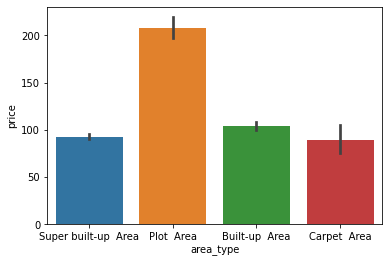

In [11]:
# Check area-type wrt price
import seaborn as sns
sns.barplot(x=data['area_type'], y=data['price'])

df=data['area_type'].replace('Plot  Area', 0)
df=df.replace('Built-up  Area', 1)
df=df.replace('Super built-up  Area', 2)
df=df.replace('Carpet  Area', 3)

data['area_type']=df

display(data.head())

# Reducing the Categories in LOCATION

In [12]:
a=data['location'].value_counts()
a=a[a<=10]
a

Basapura                          10
Nagappa Reddy Layout              10
Gunjur Palya                      10
Dodsworth Layout                  10
BTM 1st Stage                     10
                                  ..
Bapuji Layout                      1
1st Stage Radha Krishna Layout     1
BEML Layout 5th stage              1
singapura paradise                 1
Abshot Layout                      1
Name: location, Length: 1064, dtype: int64

In [13]:
data['location']=data['location'].apply(lambda x: 'other' if x in a else x)
data['location']

0        Electronic City Phase II
1                Chikka Tirupathi
2                     Uttarahalli
3              Lingadheeranahalli
4                        Kothanur
                   ...           
13315                  Whitefield
13316                       other
13317       Raja Rajeshwari Nagar
13318             Padmanabhanagar
13319                Doddathoguru
Name: location, Length: 13319, dtype: object

# Formatting data in SIZE

In [14]:
data['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '14 BHK', '8 BHK', '12 Bedroom',
       '13 BHK', '18 Bedroom'], dtype=object)

In [15]:
a=data['size'].str.split(" ", expand=True)
data['rooms']=a[0].astype(float)
data=data.drop('size', axis=1)

In [16]:
data.head(5)

,area_type,availability,location,society,total_sqft,bath,balcony,price,rooms
0,2,76,Electronic City Phase II,Society,1056,2.0,1.0,39.07,2.0
1,0,0,Chikka Tirupathi,Society,2600,5.0,3.0,120.00,4.0
2,1,0,Uttarahalli,Independent,1440,2.0,3.0,62.00,3.0
3,2,0,Lingadheeranahalli,Society,1521,3.0,1.0,95.00,3.0
4,2,0,Kothanur,Independent,1200,2.0,1.0,51.00,2.0


# Correcting TOTAL_SQFT

In [17]:
data[data['total_sqft'].str.contains('[Acres, Sq Meter, Yad, Cn, Guh, o, P]')==True]

,area_type,availability,location,society,total_sqft,bath,balcony,price,rooms
30,2,76,Yelahanka,Society,2100 - 2850,4.0,0.0,186.000,4.0
56,1,11,Devanahalli,Society,3010 - 3410,NaN,NaN,192.000,4.0
81,1,59,Hennur Road,Society,2957 - 3450,NaN,NaN,224.500,4.0
122,2,15,Hebbal,Society,3067 - 8156,4.0,0.0,477.000,4.0
137,2,16,8th Phase JP Nagar,Society,1042 - 1105,2.0,0.0,54.005,2.0
...,...,...,...,...,...,...,...,...,...
12990,2,0,Talaghattapura,Society,1804 - 2273,3.0,0.0,122.000,3.0
13059,2,0,Harlur,Society,1200 - 1470,2.0,0.0,72.760,2.0
13240,2,76,Devanahalli,Society,1020 - 1130,NaN,NaN,52.570,1.0
13265,2,77,Hoodi,Society,1133 - 1384,2.0,0.0,59.135,2.0


In [18]:
data['total_sqft']=data['total_sqft'].apply(lambda x : (float(x.split('-')[0])+float(x.split('-')[0])/2) if x.find('-')>0 else x)

In [19]:
data['total_sqft']=data['total_sqft'].astype(str).apply(lambda x : float(x.replace('Sq. Meter', ''))*10.76 if x.find('M')>0 else x)
data['total_sqft']=data['total_sqft'].astype(str).apply(lambda x : float(x.replace('Acres', ''))*43560.00 if x.find('A')>0 else x)
data['total_sqft']=data['total_sqft'].astype(str).apply(lambda x : float(x.replace('Sq. Yards', ''))*9.00 if x.find('Y')>0 else x)

In [20]:
data=data[data['total_sqft'].str.contains('[Yad, Cn, Guh, o, P]')==False]
data['total_sqft']=data['total_sqft'].astype(float)

In [21]:
#data[data['total_sqft'].str.contains('[M]')==True].replace('Sq. Meter', '', regex=True)['total_sqft'].astype(float)*10.76
#a['total_sqft'].astype(float)*10.76

# Check Outliers

area_type          AxesSubplot(0.125,0.536818;0.168478x0.343182)
availability    AxesSubplot(0.327174,0.536818;0.168478x0.343182)
total_sqft      AxesSubplot(0.529348,0.536818;0.168478x0.343182)
bath            AxesSubplot(0.731522,0.536818;0.168478x0.343182)
balcony               AxesSubplot(0.125,0.125;0.168478x0.343182)
price              AxesSubplot(0.327174,0.125;0.168478x0.343182)
rooms              AxesSubplot(0.529348,0.125;0.168478x0.343182)
dtype: object

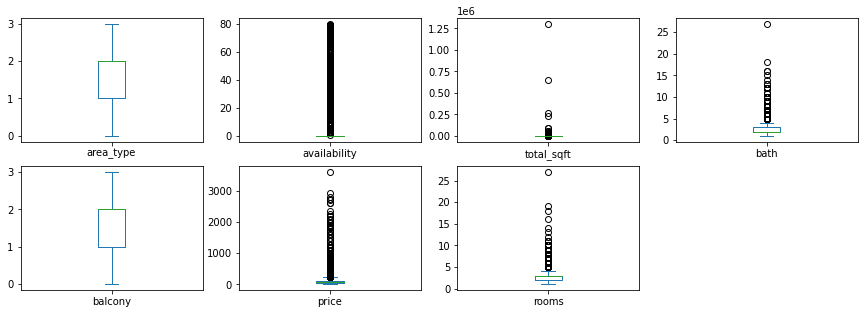

In [22]:
data.plot(kind='box', subplots=True, layout=(2,4), figsize=(15,5))

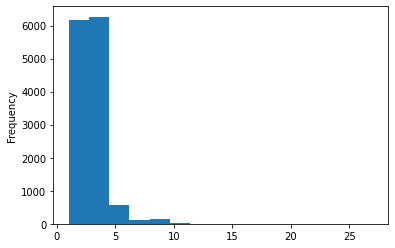

In [23]:
# Outlier removal for rooms
data['rooms'].plot(kind='hist', bins=15)
data=data[data['rooms']<5]

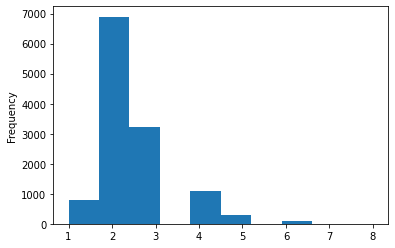

In [24]:
# Outlier removal for bath
data['bath'].plot(kind='hist', bins=10)
data=data[data['bath']<6]

In [25]:
# Outlier removal for balcony
#data['balcony'].plot(kind='hist', bins=10)

In [26]:
# Removing details which has 2 more bathrooms that no of rooms
#data[data['bath']>data['rooms']+2]
#data=data[data['bath']<data['rooms']+2]

In [27]:
# Removing details which has 1 more balcony that no of rooms
#data[data['balcony']>data['rooms']+1]
#data=data[data['balcony']<data['rooms']+1]

![](http://civilsir.com/wp-content/uploads/2021/07/20210716_095610.jpg)

In [28]:
# Outlier removal for total_sqft
display(data[data['rooms']==4]['total_sqft'].sort_values())

"""# option 1
data_1bhk=data[(data['rooms']==1) & (data['total_sqft']>45) & (data['total_sqft']<=2559.0)]
data_2bhk=data[(data['rooms']==2) & (data['total_sqft']<=8840.0)]
data_3bhk=data[(data['rooms']==3) & (data['total_sqft']>11) & (data['total_sqft']<=9000.0)]
data_4bhk=data[(data['rooms']==4) & (data['total_sqft']>60) & (data['total_sqft']<=16335.0)]"""

"""# option 2
data_1bhk=data[(data['rooms']==1) & (data['total_sqft']>300) & (data['total_sqft']<700)]
data_2bhk=data[(data['rooms']==2) & (data['total_sqft']>500) & (data['total_sqft']<900)]
data_3bhk=data[(data['rooms']==3) & (data['total_sqft']>700) & (data['total_sqft']<1300)]
data_4bhk=data[(data['rooms']==4) & (data['total_sqft']>800) & (data['total_sqft']<2000)]"""

"""# option 3
data_1bhk=data[(data['rooms']==1) & (data['total_sqft']>45) & (data['total_sqft']<=1500.0)]
data_2bhk=data[(data['rooms']==2) & (data['total_sqft']<=2000.0)]
data_3bhk=data[(data['rooms']==3) & (data['total_sqft']>11) & (data['total_sqft']<=4000.0)]
data_4bhk=data[(data['rooms']==4) & (data['total_sqft']>60) & (data['total_sqft']<=8000.0)]"""

"""# option 4
data_1bhk=data[(data['rooms']==1) & (data['total_sqft']>300) & (data['total_sqft']<=1000.0)]
data_2bhk=data[(data['rooms']==2) & (data['total_sqft']>800) & (data['total_sqft']<=1500.0)]
data_3bhk=data[(data['rooms']==3) & (data['total_sqft']>800) & (data['total_sqft']<=2400.0)]
data_4bhk=data[(data['rooms']==4) & (data['total_sqft']>60) & (data['total_sqft']<=6000.0)]"""

# option 5
data_1bhk=data[(data['rooms']==1) & (data['total_sqft']>300) & (data['total_sqft']<=1000.0)]
data_2bhk=data[(data['rooms']==2) & (data['total_sqft']>800) & (data['total_sqft']<=1500.0)]
data_3bhk=data[(data['rooms']==3) & (data['total_sqft']>800) & (data['total_sqft']<=4000.0)]
data_4bhk=data[(data['rooms']==4) & (data['total_sqft']>800) & (data['total_sqft']<=8000.0)]

data=pd.concat([data_1bhk, data_2bhk, data_3bhk, data_4bhk])

data.info()

4086         1.0
11558       60.0
992        315.0
12464      350.0
8517       360.0
          ...   
440      11890.0
1234     14000.0
12470    16335.0
2623     30000.0
5469     36000.0
Name: total_sqft, Length: 1304, dtype: float64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11609 entries, 20 to 13318
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     11609 non-null  int64  
 1   availability  11609 non-null  int64  
 2   location      11608 non-null  object 
 3   society       11609 non-null  object 
 4   total_sqft    11609 non-null  float64
 5   bath          11609 non-null  float64
 6   balcony       11255 non-null  float64
 7   price         11609 non-null  float64
 8   rooms         11609 non-null  float64
dtypes: float64(5), int64(2), object(2)
memory usage: 907.0+ KB


count    4716.000000
mean     1660.076029
std       431.377873
min       832.000000
25%      1385.000000
50%      1579.000000
75%      1819.000000
max      4000.000000
Name: total_sqft, dtype: float64
Min =  732.5
Max =  2472.5


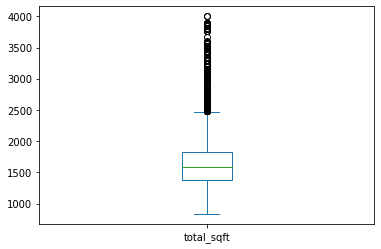

In [29]:
data[(data['rooms']==3)]['total_sqft'].plot(kind='box')

print(data[(data['rooms']==3)]['total_sqft'].describe())
print("Min = ", 1385-(1.5)*(1820-1385))
print("Max = ",1820+(1.5)*(1820-1385))

count    1194.000000
mean     2683.200331
std      1204.778670
min       810.000000
25%      1700.000000
50%      2502.000000
75%      3435.750000
max      7500.000000
Name: total_sqft, dtype: float64
Min =  -804.0
Max =  6140.0


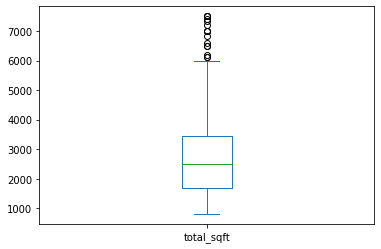

In [30]:
data[(data['rooms']==4)]['total_sqft'].plot(kind='box')

print(data[(data['rooms']==4)]['total_sqft'].describe())
print("Min = ", 1800-(1.5)*(3536-1800))
print("Max = ",3536+(1.5)*(3536-1800))

# Check NULL values

In [31]:
data.isnull().sum()/11326

area_type       0.000000
availability    0.000000
location        0.000088
society         0.000000
total_sqft      0.000000
bath            0.000000
balcony         0.031256
price           0.000000
rooms           0.000000
dtype: float64

In [32]:
data['location']=data['location'].fillna(data['location'].mode()[0])

In [33]:
# NULLs Dropped
data1=data.copy()
data1=data1.dropna()

In [34]:
# NULLs imputed
data2=data.copy()
data2['rooms']=data2['rooms'].fillna(data2['rooms'].mode()[0])
data2['bath']=data2['bath'].fillna(data2['bath'].mode()[0])
data2['balcony']=data2['balcony'].fillna(data2['balcony'].mode()[0])

In [35]:
display(data1.head())
display(data2.head())

,area_type,availability,location,society,total_sqft,bath,balcony,price,rooms
20,1,0,Kengeri,Independent,600.0,1.0,1.0,15.00,1.0
24,2,67,other,Society,510.0,1.0,0.0,25.25,1.0
42,2,0,other,Society,600.0,1.0,0.0,38.00,1.0
43,0,0,Yelahanka,Independent,660.0,1.0,0.0,48.00,1.0
171,2,0,Attibele,Society,450.0,1.0,1.0,11.00,1.0


,area_type,availability,location,society,total_sqft,bath,balcony,price,rooms
20,1,0,Kengeri,Independent,600.0,1.0,1.0,15.00,1.0
24,2,67,other,Society,510.0,1.0,0.0,25.25,1.0
42,2,0,other,Society,600.0,1.0,0.0,38.00,1.0
43,0,0,Yelahanka,Independent,660.0,1.0,0.0,48.00,1.0
171,2,0,Attibele,Society,450.0,1.0,1.0,11.00,1.0


In [36]:
def pca_func(x, n):
    # PCA
    from sklearn.decomposition import PCA
    pca = PCA(n_components=n)
    x=pca.fit_transform(x)
    return x

In [37]:
# Pre-processing 1
def preprocess1(data_func, pca_test):
    # Label Encoding
    from sklearn.preprocessing import LabelEncoder
    label = LabelEncoder()
    data_func['society']=label.fit_transform(data_func['society'])
    
    # One-hot Encoding
    data_func_location = pd.get_dummies(data_func['location'])
    data_func=pd.concat([data_func, data_func_location], axis=1)
    data_func=data_func.drop(columns=['location', 'area_type', 'availability', 'society'])
    
    # Split input and output
    x=data_func.drop(columns=['price'])
    y=data_func['price']

    # With PCA
    if (pca_test>0):
        x=pca_func(x, pca_test)
     
    # Standardization
    from sklearn.preprocessing import StandardScaler
    scale=StandardScaler()
    x=scale.fit_transform(x)
    y=scale.fit_transform(pd.DataFrame(y))

    # Train-Test split
    from sklearn.model_selection import train_test_split
    x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=7, shuffle=True)
    
    return(x_train, x_test, y_train, y_test, scale)

In [38]:
# Linear Regression

def Linear_Regression_func(data_func, pca_test):
    x_train, x_test, y_train, y_test, scale = preprocess1(data_func, pca_test)

    # Model Creation
    from sklearn.linear_model import LinearRegression
    model=LinearRegression()
    model.fit(x_train, y_train)
    y_pred=model.predict(x_test)
    
    y_pred=scale.inverse_transform(y_pred)
    y_test=scale.inverse_transform(y_test)

    # Model score
    from sklearn import metrics
    return(metrics.r2_score(y_test, y_pred))

In [39]:
# Linear Regression with cross validation

def Linear_Regression_func2(data_func):
    # Label Encoding
    from sklearn.preprocessing import LabelEncoder
    label = LabelEncoder()
    data_func['society']=label.fit_transform(data_func['society'])
    
    # One-hot Encoding
    data_func_location = pd.get_dummies(data_func['location'])
    data_func=pd.concat([data_func, data_func_location], axis=1)
    data_func=data_func.drop(columns=['location', 'area_type', 'availability', 'society'])
    
    # Split input and output
    x=data_func.drop(columns=['price'])
    y=data_func['price']

    # Standardization
    from sklearn.preprocessing import StandardScaler
    scale=StandardScaler()
    x=scale.fit_transform(x)
    y=scale.fit_transform(pd.DataFrame(y))

    # Model Creation
    from sklearn.linear_model import LinearRegression
    model=LinearRegression()
    
    # K-Fold cross validation
    from sklearn.model_selection import cross_val_score
    score=cross_val_score(model, x, y, cv=10, scoring='r2')
    
    # Model score
    print("R2 score", score.mean())

In [40]:
# Random Forest

def RandomForest_func(data_func, pca_test):
    x_train, x_test, y_train, y_test, scale = preprocess1(data_func, pca_test)

    # Model Creation
    from sklearn.ensemble import RandomForestRegressor
    model=RandomForestRegressor()
    model.fit(x_train, y_train.ravel())
    y_pred=model.predict(x_test)
    
    y_pred=scale.inverse_transform(pd.DataFrame(y_pred))
    y_test=scale.inverse_transform(pd.DataFrame(y_test))

    # Model score
    from sklearn import metrics
    return(metrics.r2_score(y_test, y_pred))

In [41]:
# AdaBoost

def AdaBoost_func(data_func, pca_test):
    x_train, x_test, y_train, y_test, scale = preprocess1(data_func, pca_test)

    # Model Creation
    from sklearn.ensemble import AdaBoostRegressor
    model=AdaBoostRegressor(random_state=7)
    model.fit(x_train, y_train.ravel())
    y_pred=model.predict(x_test)
    
    y_pred=scale.inverse_transform(pd.DataFrame(y_pred))
    y_test=scale.inverse_transform(pd.DataFrame(y_test))

    # Model score
    from sklearn import metrics
    return(metrics.r2_score(y_test, y_pred))

print(AdaBoost_func(data1,0))

-0.013795090483066152


In [42]:
# XGBoost

def XGBoost_func(data_func, pca_test):
    x_train, x_test, y_train, y_test, scale = preprocess1(data_func, pca_test)

    # Model Creation
    from xgboost import XGBRegressor
    model=XGBRegressor()
    model.fit(x_train, y_train)
    y_pred=model.predict(x_test)
    
    y_pred=scale.inverse_transform(pd.DataFrame(y_pred))
    y_test=scale.inverse_transform(pd.DataFrame(y_test))

    # Model score
    from sklearn import metrics
    return(metrics.r2_score(y_test, y_pred))

In [43]:
def final_func(data1):
    linear_data=pd.DataFrame([], columns=['PCA', 'Linear_Regression'])
    randomforest_data=pd.DataFrame([], columns=['PCA', 'Random_Forest_Regression'])
    adaboost_data=pd.DataFrame([], columns=['PCA', 'AdaBoost_Regression'])
    xgboost_data=pd.DataFrame([], columns=['PCA', 'XGBoost_Regression'])

    for i in np.arange(0,15, 3):

        if (i==0):
            print("******* Without PCA ***********")
            """print(">>>>>>> Linear Regression with cross-validation")
            Linear_Regression_func2(data1)
            Linear_Regression_func2(data2)"""
        else:
            print("******* With PCA = ", i ,"*********")

        # Liner Regression
        linear_data=linear_data.append({'PCA':i, 'Linear_Regression': Linear_Regression_func(data1, i)}, ignore_index=True)

        # Random Forest Regression
        randomforest_data=randomforest_data.append({'PCA':i, 'Random_Forest_Regression': RandomForest_func(data1, i)}, ignore_index=True)

        # AdaBoost Regression
        adaboost_data=adaboost_data.append({'PCA':i, 'AdaBoost_Regression': AdaBoost_func(data1, i)}, ignore_index=True)

        # XGBoost Regression
        xgboost_data=xgboost_data.append({'PCA':i, 'XGBoost_Regression': XGBoost_func(data1, i)}, ignore_index=True)


    display(linear_data[linear_data['Linear_Regression']==linear_data['Linear_Regression'].max()])
    display(randomforest_data[randomforest_data['Random_Forest_Regression']==randomforest_data['Random_Forest_Regression'].max()])
    display(adaboost_data[adaboost_data['AdaBoost_Regression']==adaboost_data['AdaBoost_Regression'].max()])
    display(xgboost_data[xgboost_data['XGBoost_Regression']==xgboost_data['XGBoost_Regression'].max()])

In [44]:
#display(linear_data)
#display(randomforest_data)
#display(adaboost_data)
#display(xgboost_data)

In [45]:
final_func(data1)
final_func(data2)

******* Without PCA ***********
******* With PCA =  3 *********
******* With PCA =  6 *********
******* With PCA =  9 *********
******* With PCA =  12 *********


,PCA,Linear_Regression
0,0.0,0.631928


,PCA,Random_Forest_Regression
0,0.0,0.598083


,PCA,AdaBoost_Regression
1,3.0,0.446347


,PCA,XGBoost_Regression
0,0.0,0.706639


******* Without PCA ***********
******* With PCA =  3 *********
******* With PCA =  6 *********
******* With PCA =  9 *********
******* With PCA =  12 *********


,PCA,Linear_Regression
0,0.0,0.650228


,PCA,Random_Forest_Regression
0,0.0,0.686266


,PCA,AdaBoost_Regression
3,9.0,0.454365


,PCA,XGBoost_Regression
0,0.0,0.740179


In [46]:
# rooms<5, bath<5, data1 ---- PCA=0, XGBOOST=0.71
# rooms<6, bath<6, data2 ---- PCA=0, XGBOOST=0.74
# rooms<11, bath<7, data2 ---- PCA=0, XGBOOST=0.72
# rooms<11, bath<6, data2 ---- PCA=0, XGBOOST=0.74
# rooms<5, bath<6, data2 ---- PCA=0, XGBOOST=0.74

# Final R2 score = 0.74
### Model = XGBOOST
### No PCA
### NULL values are imputed with MODE
### Outlier Removal with ROOMS<5 and BATHS<6